In [81]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.api import qqplot
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df_befor = pd.read_csv('before-covid.csv')
df_after = pd.read_csv("after-covid.csv")

In [ ]:
df_befor.sample(5)

,room_type,price,availability_365,lat,long
1821,Entire home/apt,118.800000,233.500000,39.221928,-9.127324
1484,Private room,73.978261,287.000000,38.755492,-9.479721
1594,Entire home/apt,165.568862,220.371258,38.757276,-9.482548
2474,Shared room,13.200000,259.000000,38.753879,-9.146474
2560,Entire home/apt,305.425926,171.055556,38.737737,-9.196339


In [ ]:
df_after.sample(5)

,room_type,price,availability_365,lat,long
7258,Entire home/apt,75,305,38.723530,-9.168015
13990,Entire home/apt,45,1,38.747192,-9.133484
8358,Entire home/apt,50,362,38.803235,-9.376319
716,Private room,15,77,38.731805,-9.114184
13840,Entire home/apt,85,254,38.710520,-9.149865


### T-Test:

<div dir='rtl'>

برای تعیین اختلاف معناداری میانگین یک گروه با یک مقدار پیش فرض و یا میانگین های (T-test) تی تست
دو گروه به کار می روند.<br>
تی تست تفاوت میان میانگین حسابی دو نمونه کمی را تعیین می کند.<br>
p_vale احتمال مشاهده ی شدید را با فرض صحت فرضیه صفر نشان می دهد که نمونه ها از جمعیت هایی با میانگین جمعیت یکسان گرفته شده اند:<br>
اگر مقدار p_value بیشتر از آستانه ی انتخاب شده باشد احتمال تصادفی بودن مشاهدات ما بیشتر می شود. اگر کوچک تر باشد فرضیه ی صفر میانگین برابر داریم(به هم دیگر مرتبط اند.)
</div>

In [4]:
def t_test(x, y):
  _, p_value = st.ttest_ind(x, y, equal_var = False)
  if p_value > .05:
    return '𝑖𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡'
  elif p_value < .05:
    return '𝑟𝑒𝑙𝑎𝑡𝑒𝑑'

In [5]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return round(m, 4)

# **TASK 1** 

---



---


<div dir='rtl'>
در این تسک وظیفه ی ما این است که میانگین قیمت هتل ها را قبل از و بعد از COVID بررسی کینم که آیا ارتباطی دارند با نه؟!<br>
برای این کار ابتدا میانگین و ضریب اطمینان را مشخص می کنیم و سپس با استفاده از T-Test و P Value ارتباط داشتن یا نداشتن دو قیمت را چک میکنیم.
نتیجه در <b>پایان کد <b>ها درج می شود.


</div>

In [6]:
price_befor = df_befor['price']
price_after = df_after['price']

In [7]:
mean_befor = round(price_befor.mean(), 2)
mean_after = round(price_after.mean(), 2)

m_interval_be4 = round(mean_befor -  mean_confidence_interval(price_befor),4)
m_interval_aftr = round(mean_after - mean_confidence_interval(price_after), 4)

print(f'Mean before COVID: {mean_befor}, Mean After COVID : { mean_after } \n')
print(f'Mean Interval before COVID: {m_interval_be4}, Mean Interval After COVID : { m_interval_aftr } ')

Mean before COVID: 83.63, Mean After COVID : 106.47 

Mean Interval before COVID: -0.0046, Mean Interval After COVID : 0.0019 


Price Mean: 
  - Before COVID: 83.63 ± 0.0046
  - After COVID: 106.47 ± 0.0019

𝑃 > 0. 1 𝑜𝑟 0. 5 −> 𝑛𝑜𝑡 𝑠𝑖𝑔𝑛𝑖𝑓𝑖𝑐𝑎𝑛𝑡 (𝑖𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡)<br>
𝑃 =< 0. 1 𝑜𝑟 0. 5 −> 𝑚𝑎𝑟𝑔𝑖𝑛𝑎𝑙𝑙𝑦 𝑠𝑖𝑔𝑛𝑖𝑓𝑖𝑐𝑎𝑛𝑡) <br>
𝑃 =< 0. 05 −> 𝑠𝑖𝑔𝑛𝑖𝑓𝑖𝑐𝑎𝑛𝑡 (𝑟𝑒𝑙𝑎𝑡𝑒𝑑)) <br>
𝑃 =< 0. 01 −> 𝐻𝑖𝑔ℎ𝑙𝑦 𝑠𝑖𝑔𝑛𝑖𝑓𝑖𝑐𝑎𝑛𝑡 (𝑟𝑒𝑙𝑎𝑡𝑒𝑑)) <br>

In [8]:
p_value = t_test(price_befor, price_after)

print( f' The relationship between 2 Prices:\n\t \'{p_value}\'' )

 The relationship between 2 Prices:
	 '𝑟𝑒𝑙𝑎𝑡𝑒𝑑'



<div dir='rtl' font-size= 21>
<b>
نتیجه گیری :
</b>
</div>

---

---

<div dir='rtl'>

   از مقادیر میانیگیم ها مشخص است که بعد زا شروع بیماری قیمت ها افزایش چشمگیری  داشته و آزمایش t-test مشخص می کند که این افزایش ارتباط دارد که این ارتباط مشخصا به دلیل کمبود توریست و کاهش شدید مسافرت ها و افزایش قرنطینه اسن.
</div>

# TASK 2

In [9]:
ab = availability_before = df_befor['availability_365']
aa = availability_after = df_after['availability_365']

In [10]:
mean_availability_before = round(availability_before.mean(), 2)
mean_availability_after = round(availability_after.mean(), 2)

m_ava_interval_be4 = round(mean_availability_before -  mean_confidence_interval(availability_before),4)
m_ava_interval_aftr = round(mean_availability_after - mean_confidence_interval(availability_after), 4)

print(f'Mean Availability Before COVID: {mean_availability_before}, Mean availability After COVID : {mean_availability_after } \n')
print(f'Mean Availability Interval before COVID: {m_ava_interval_be4}, Mean Availability Interval After COVID : { m_ava_interval_aftr } ')

Mean Availability Before COVID: 243.37, Mean availability After COVID : 211.13 

Mean Availability Interval before COVID: -0.0023, Mean Availability Interval After COVID : 0.0001 


Availability Mean: 
  - Before COVID: 243.37 ± 0.0023
  - After COVID: 211.13 ± 0.0001 

In [11]:
ava_p_value = t_test(ab, aa)
print( f' The Relationship Between 2 \"Availability\" :\n\t \' { ava_p_value} \'' )

 The Relationship Between 2 "Availability" :
	 ' 𝑟𝑒𝑙𝑎𝑡𝑒𝑑 '


<div dir='rtl'>
<b>
نتیجه گیری :
</b>

---



---


</div>

<div dir='rtl'>
کاهش شدید مسافرت و عدم خروج از منزل باعث شده است که میزان در دسترس بود منازل نیز کاهش داشته باشد.<br>
از طرفی همین کاهش در دسترس بودن؛ خود می تواند دلیلی بر افزایش قیمت نیز باشد<br>
مرتبط بودن میزان در دسترس بود قبل و بعد از کووید نیز توسط آزمایش t-test اثبات شده است.
<div>

# TASK 3

In [12]:
# ALL ROOMS
before_rooms = df_befor['room_type']
after_rooms = df_after['room_type']
# BEFORE
private_rooms_before = df_befor.query("room_type == 'Private room' ")
Shared_rooms_before = df_befor.query("room_type == 'Shared room' ") 
apt_rooms_before = df_befor.query("room_type == 'Entire home/apt' ")
# AFTER
private_rooms_after  = df_after.query("room_type == 'Private room' ")
Shared_rooms_after   = df_after.query("room_type == 'Shared room' ") 
apt_rooms_after     = df_after.query("room_type == 'Entire home/apt' ")

In [13]:
# BEFORE RATIOS
private_before_ratio  = len(private_rooms_before) / len(before_rooms)
Shared_before_ratio   = len(Shared_rooms_before)  /  len(before_rooms)
apt_before_ratio      = len(apt_rooms_before)     /     len(before_rooms)

In [14]:
# AFTER RATIOS
private_after_ratio  = len(  private_rooms_after  )  / len(after_rooms)
Shared_after_ratio   = len(  Shared_rooms_after  )  / len(after_rooms)
apt_after_ratio      = len(  apt_rooms_after     )   / len(after_rooms)

In [15]:
print(f"BEFORE:\n\tprivate : {private_before_ratio:.2f} ,Shared: {Shared_before_ratio:.2f} ,Entire home/apt: {apt_before_ratio:.2f}")

print(f'AFTER:\n\tprivate {private_after_ratio:.2f}, Shared: {Shared_after_ratio:.2f} ,Entire home/apt: {apt_after_ratio:.2f}' )

BEFORE:
	private : 0.37 ,Shared: 0.21 ,Entire home/apt: 0.43
AFTER:
	private 0.24, Shared: 0.02 ,Entire home/apt: 0.74


Private room Ratio: 
  - Befor COVID: 37%
  - After COVID: 24%


Shared room Ratio: 
  - Befor COVID: 21%
  - After COVID: 2%


Entire home/apt Ratio: 
  - Befor COVID: 43%
  - After COVID: 74%

<div dir='rtl'>
نتیجه گیری :
<div>

---



---



<div dir='rtl'>
درصد ها گویای همه چیز اند. <br>
منازل اشتراکی به ظرز چشم گیری سقوط کرده اند. دلیل آن هم عدم اطمینان به سالم هم اتاقی غریبه می توان یافت. 
در مقابل اتاق های خصوصی از ریزش کمتری برخوردار بودند.<br>
از طرفی اجاره ی کل خانه یا آپارتمان افزایش داشته است که میتواند به دلیل تقاضا برای محل قرنطینه و یا حتی ارزان بودن این خانه نسبت به دو نوع دیگر باشد.
</div>

# TASK 4

<div dir= 'rtl'>
بررسی این که آیا قیمت ها از توزیع نرمال پیروی می کند یا نه؟<br>
برای این کار از 4 تست استفاده می کنیم<br>
- تست Shapiro <br>
- تست D'Agostino's K^2 <br>
- تست Anderson-Darling <br>
- تست QQ-PLOT <br>
</div>

In [16]:
## Normality Test  BEFORE
s_stat_b, s_p_b = st.shapiro(price_befor)
DA_stat_b, DA_p_b = st.normaltest(price_befor)
anderson_result_b = st.anderson(price_befor)

print(f"Price Before COVID:\n Normality Test base on \n Sharpino:\t {s_stat_b:.4f}, {s_p_b:.4f},\n D'Agostino's:\t {DA_stat_b:.4f}, {DA_p_b:.4f}\n Anderson-Darling:\t {anderson_result_b}\n")
## Normality Test  AFTER
s_stat_a, s_p_a = st.shapiro(price_after)

DA_stat_a, DA_p_a = st.normaltest(price_after)

anderson_result_a = st.anderson(price_after)
print(f"Price after COVID\n Normality Test base on \n Sharpino:\t {s_stat_a:.4f}, {s_p_a:.4f}\n D'Agostino's:\t {DA_stat_a:.4f}, {DA_p_a:.4f}\n Anderson-Darling:\t {anderson_result_a}")


Price Before COVID:
 Normality Test base on 
 Sharpino:	 0.7779, 0.0000,
 D'Agostino's:	 1929.7289, 0.0000
 Anderson-Darling:	 AndersonResult(statistic=109.67288043828194, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Price after COVID
 Normality Test base on 
 Sharpino:	 0.1336, 0.0000
 D'Agostino's:	 55335.8348, 0.0000
 Anderson-Darling:	 AndersonResult(statistic=5752.9617826649555, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Figure size 540x360 with 0 Axes>

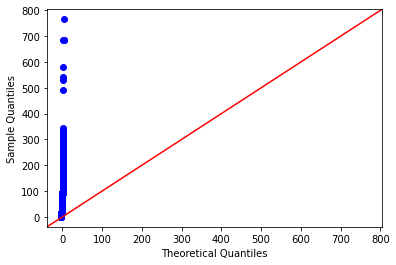

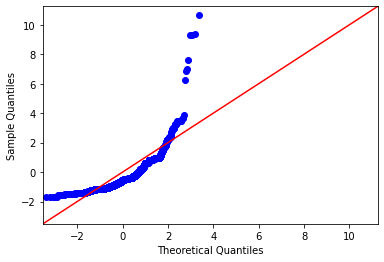

In [17]:
# PLOTS
plt.figure(dpi=90)
qqplot(price_befor, line='45');
price_after = (price_befor - price_after.mean()) / price_befor.std();
qqplot(price_after, line='45');

<div dir='rtl'>
<b>نتیجه گیری:</b> <br>
طبق نتایج هر 4 آزمایش قیمت ها از منحنی نرمال <b> پیروی نمی کنند <b>.
<br>
<div>

Price is Non-Normal
  - P = 0.0000

# TASK 5

# Classic Probibility
#$\large P(events)={\frac {{𝑜𝑓.𝑜𝑝𝑡𝑖𝑚𝑎𝑙.𝑠𝑡𝑎𝑡𝑒}}{{𝑜𝑓.𝑎𝑙𝑙.𝑠𝑡𝑎𝑡𝑒}}}\,
$


Prob of Price < 80 (Before COVID)
  - All Room = 60.4%
  - Private Room = 28.5%

In [20]:
p_above_80 = df_befor.query('price < 80')
p_event = len(p_above_80) / len(df_befor['price'])
print(p_event)

0.6040118870728083


In [22]:
p_private_80 = df_befor.query("room_type	== 'Private room' & price < 80 ")
p_event_pr = len(p_private_80) / len(df_befor['price'])
print(p_event_pr)

0.2852897473997028


# TASK 6
## Regression

availability_365 & price

<div dir= 'rtl'>
<b> مرحله ی اول : </b>
<br>مدیریت داده های پرت 
<div>

In [27]:
# level 1 = find outliers
# z-score
def zscore_outlier(data):
  outliers = []
  threshold=3
  mean_1 = np.mean(data)
  std_1 =np.std(data)
  for y in data:
    z_score = (y - mean_1)/std_1
    if np.abs(z_score) > threshold:
      outliers.append(y)
  return outliers

outlier1 = zscore_outlier(df_befor['price'])
outlier2 = set(zscore_outlier(df_befor['availability_365'] ))         
print(outlier1)
print(outlier2)

[332.0, 684.875, 580.2, 345.0, 332.7142857, 322.48, 283.7096774, 320.0, 273.3333333, 309.0, 309.2075472, 309.8301887, 321.84, 292.5, 331.1666667, 282.375, 765.5714286, 684.875, 320.0, 320.0, 685.5, 292.5, 288.1666667, 286.3793103, 292.5, 295.0, 310.6226415, 292.5, 492.6666667, 287.4482759, 320.0, 320.0, 305.0, 320.0, 316.0192308, 531.5454545, 312.6666667, 278.75, 305.4259259, 540.7777778, 270.4545455, 320.0, 292.3333333]
{0.0, 1.0, 2.0, 10.0, 14.4, 16.0, 25.0}


In [70]:
# level 2 = outlier handling
price = np.array(df_befor['price'].replace(outlier1, df_befor['price'].mean() ))
availability = np.array(df_befor['availability_365'].replace(outlier2, df_befor['availability_365'].mean() ))

df_reg = pd.DataFrame({ 
    "price" : price,
    "availability" : availability })

<div dir='rtl'>
<b> مرحله ی دو : </b>
<br> انجام تست نرمالیتی برای یافتن جواب این سوال که آیا از منحنی نرمال پبروی می کنند یا نه <br>
تست شارپینو فرض صفر را برای هر دوس ستون price و availbility رد می کند پس داده ها از نوع نرمال نیستند.<br>
همچنین پراکندگی داده ها نسنبت به خط 45 درجه در نمودار QQ-PLOT نیز دلیل اثبات کننده ی دیگری است.

In [99]:
# level 3 = Normality Test
stat1, p1 = st.shapiro( df_reg["price"] )
print('Marijuana Sharpino Test\n stat=%.3f, p=%.5f' % (stat1, p1))

stat2, p2 = st.shapiro( df_reg["availability"] )
print('Amephtamine Sharpino Test\n stat=%.3f, p=%.5f' % (stat2, p2))

Marijuana Sharpino Test
 stat=0.910, p=0.00000
Amephtamine Sharpino Test
 stat=0.910, p=0.00000


p-value ≤ 0.05, the null hypothesis rejected

<Figure size 540x360 with 0 Axes>

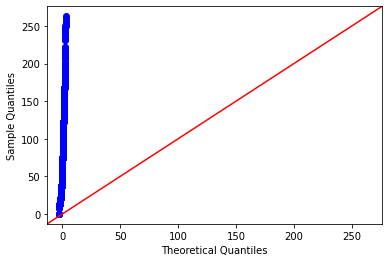

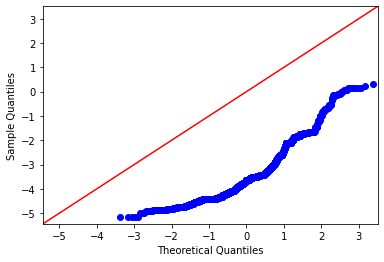

In [72]:
plt.figure(dpi=90)
qqplot(price, line='45');
df_reg["availability"] = (df_reg["price"] - df_reg["availability"].mean()) / df_reg["price"].std();
qqplot(df_reg["availability"], line='45');

<div dir='rtl'>
<b> مرحله ی سوم تست همبستگی </b> <br>
با قرار داشتن مقدار در در بازه ی -.6 تا 0 میتوان این نتیجه را گرفت که قیمت و در درسترس بودن همبستگی  متوسط منفی با یکدیگر دارند.
<div> منفی به این معنا وجود رابطه ی عکس است.

+1 - Complete positive correlation. <br>
+0.8 - Strong positive correlation. <br>
+0.6 - Moderate positive correlation. <br>
0 - no correlation whatsoever. <br>
-0.6 - Moderate negative correlation. <br>
-0.8 - Strong negative correlation. <br>
-1 - Complete negative correlation. <br>

Pearson
 r = -0.107, p = 0.000


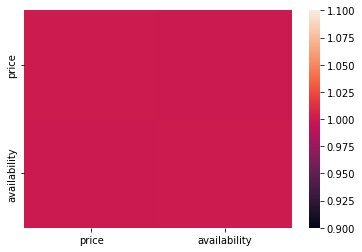

In [105]:
# level 4 = Corelation Test

r, p = st.pearsonr( price , availability)
print('Pearson\n r = %.3f, p = %.3f' % (r, p))


sns.heatmap(df_reg.corr() );
# df_reg.drop('availability', axis=1, inplace= False)
# sns.heatmap(df_reg.corr(), cmap='mako');

<div dir='rtl'>
<b> مرحله ی چهارم برازش یک مدل رگرسیون خطی </b> <br>
برای برازش یا فیت کردن داده ها یمان را به دو بخش داده های تست و ترین با نسبت 10 به 90 تقسیم می کنیم. و در آخر با استفاده از داده های تست و تابع score مقدار دقت تابع را اندازه گیری می کنیم.
<div>

In [110]:

# level 5 make and fit moddel

x_train, x_test, y_train, y_test = train_test_split( price.reshape(-1,1) , availability , test_size = .9, shuffle = True)

Reg = LinearRegression()

Reg.fit(x_train, y_train)
score = Reg.score(x_train, y_train)
print("Score: ", round(score, 6))
#Equation coefficient and Intercept
print('Coefficient: \n', Reg.coef_[0])
print('Intercept: \n', Reg.intercept_)


Score:  0.013309
Coefficient: 
 -0.15382146485632722
Intercept: 
 258.40111572563717


<div dir='rtl'>
<b> مرحله ی نهایی : نمایش مدل و داده ها </b>
</div>

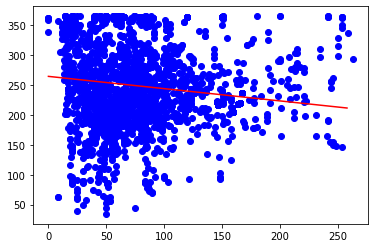

In [83]:
predicted= Reg.predict(x_test)
x = list( range( 259 ) )

y = [i * Reg.coef_[0] + Reg.intercept_ for i in x]
plt.scatter(price , availability, color='blue')
plt.plot(x , y, color="red")

# Viaulazation

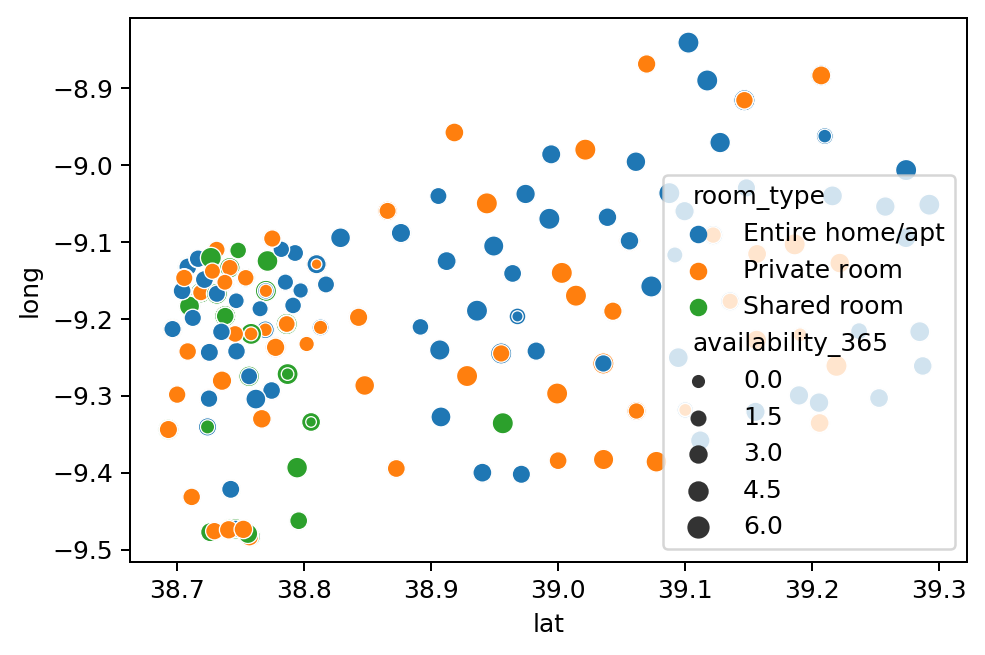

In [98]:

plt.figure(dpi=180)

sns.scatterplot(data=df_befor, x='lat', y='long', hue='room_type',size = df_befor['availability_365']/50)
plt.show()

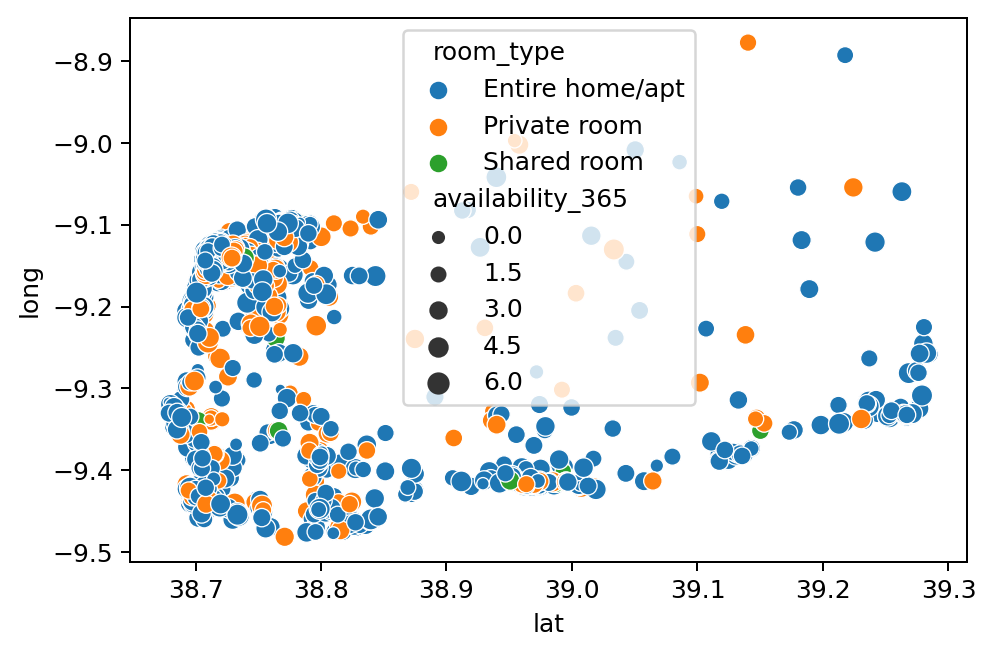

In [97]:
plt.figure(dpi=180)
sns.scatterplot(data=df_after, x='lat', y='long', hue='room_type', size = df_befor['availability_365']/50)